<a href="https://colab.research.google.com/github/asdfasdf0311/kaggle-1/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터로드
train = pd.read_csv('/content/drive/MyDrive/ydms/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ydms/titanic/test.csv')

In [ ]:
#train, test데이터 합쳐놓기
train = pd.concat([train, test], ignore_index=True)

train = train.drop('Cabin', axis=1)

train['Family'] = train['SibSp'] + train['Parch']
#train = train.drop('SibSp', axis=1)
#train = train.drop('Parch', axis=1)

train['JoinWith'] = 0
# 'Family'가 1 이상인 행에 대해 'JoinWith'를 1로 설정
train.loc[train['Family'] >= 1, 'JoinWith'] = 1

import re

train['Title'] = train['Name'].apply(lambda x: re.search(',\s(.*?)\.', x).group(1) if re.search(',\s(.*?)\.', x) else '')

#Mlle, Ms, Lady -> Miss
#the Countess, Mme, Dona -> Mrs
#Dr, Rev, Major, Col, Capt, Sir, Don, Jonkheer -> Mr

# 호칭 변경 규칙에 따라 새로운 'Title' 값을 생성
title_mapping = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Lady': 'Miss',
    'the Countess': 'Mrs',
    'Mme': 'Mrs',
    'Dona': 'Mrs',
    'Dr': 'Mr',
    'Rev': 'Mr',
    'Major': 'Mr',
    'Col': 'Mr',
    'Sir': 'Mr',
    'Don': 'Mr',
    'Jonkheer': 'Mr',
    'Capt': 'Mr',
}

# 새로운 'Title' 값이 Mr, Mrs, Miss, Master가 아닌 경우에만 규칙에 따라 변경
train['Title'] = train['Title'].apply(lambda x: title_mapping[x] if x not in ['Mr', 'Mrs', 'Miss', 'Master'] else x)

train = train.drop('PassengerId', axis=1)
train = train.drop('Name', axis=1)
train = train.drop('Ticket', axis=1)

train['Baby'] = (train['Age'] <= 5).astype(int)

# "RichWoman" 변수 생성
train['RichWoman'] = ((train['Pclass'].isin([1, 2])) & (train['Sex'] == 'female')).astype(int)

train['BigFamily'] = (train['Family'] >= 4).astype(int)

# Fare 열의 결측치를 Pclass가 3인 Fare의 평균으로 대체
train['Fare'].fillna(13.6756, inplace=True)

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

train['agemean'] = np.where(
    (train['Pclass'] == 1) & (train['Title'] == 'Master') & (train['Age'].isnull()), 1,
    np.where(
        (train['Pclass'] == 1) & (train['Title'] == 'Miss') & (train['Age'].isnull()), 2,
        np.where(
            (train['Pclass'] == 1) & (train['Title'] == 'Mr') & (train['Age'].isnull()), 3,
            np.where(
                (train['Pclass'] == 1) & (train['Title'] == 'Mrs') & (train['Age'].isnull()), 4,
                np.where(
                    (train['Pclass'] == 2) & (train['Title'] == 'Master') & (train['Age'].isnull()), 5,
                    np.where(
                        (train['Pclass'] == 2) & (train['Title'] == 'Miss') & (train['Age'].isnull()), 6,
                        np.where(
                            (train['Pclass'] == 2) & (train['Title'] == 'Mr') & (train['Age'].isnull()), 11,
                            np.where(
                                (train['Pclass'] == 2) & (train['Title'] == 'Mrs') & (train['Age'].isnull()), 22,
                                np.where(
                                    (train['Pclass'] == 3) & (train['Title'] == 'Master') & (train['Age'].isnull()), 33,
                                    np.where(
                                        (train['Pclass'] == 3) & (train['Title'] == 'Miss') & (train['Age'].isnull()), 44,
                                        np.where(
                                            (train['Pclass'] == 3) & (train['Title'] == 'Mr') & (train['Age'].isnull()), 55,
                                            np.where(
                                                (train['Pclass'] == 3) & (train['Title'] == 'Mrs') & (train['Age'].isnull()), 66, 0
                                            )
                                        )
                                    )
                                )
                            )
                        )
                    )
                )
            )
        )
    )
)

# agemean 값에 따라 Age 결측치 대체
train['Age'] = np.where(train['agemean'] == 1, 7.0,
                        np.where(train['agemean'] == 2, 30.4,
                                 np.where(train['agemean'] == 3, 42.2,
                                          np.where(train['agemean'] == 4, 42.7,
                                                   np.where(train['agemean'] == 5, 2.8,
                                                            np.where(train['agemean'] == 6, 20.9,
                                                                     np.where(train['agemean'] == 11, 32.9,
                                                                              np.where(train['agemean'] == 22, 33.5,
                                                                                       np.where(train['agemean'] == 33, 6.1,
                                                                                                np.where(train['agemean'] == 44, 17.4,
                                                                                                         np.where(train['agemean'] == 55, 28.3,
                                                                                                                  np.where(train['agemean'] == 66, 32.3, train['Age']))))))))))))

#agemean 변수제거
train = train.drop('agemean', axis=1)

#수치화
train.replace({'male': 1, 'female': 0}, inplace=True)
train['Fare100'] = np.where(train['Fare'] >= 100, 1, 0) #Fare변수 100기준으로 0과1분배


train = train.drop('Fare', axis=1)
train = train.drop('SibSp', axis=1)
train = train.drop('Parch', axis=1)

#Age범주화
train['Age_band'] = 0
train.loc[train['Age'] <= 16, 'Age_band'] = 0
train.loc[(train['Age'] > 16) & (train.Age <= 32), 'Age_band'] = 1
train.loc[(train.Age > 32) & (train.Age <= 48), 'Age_band'] = 2
train.loc[(train.Age > 48) & (train.Age <= 64), 'Age_band'] = 3
train.loc[train.Age > 64, 'Age_band'] = 4

train = train.drop('Age', axis=1)

train

,Survived,Pclass,Sex,Embarked,Family,JoinWith,Title,Baby,RichWoman,BigFamily,Fare100,Age_band
0,0.0,3,1,S,1,1,Mr,0,0,0,0,1
1,1.0,1,0,C,1,1,Mrs,0,1,0,0,2
2,1.0,3,0,S,0,0,Miss,0,0,0,0,1
3,1.0,1,0,S,1,1,Mrs,0,1,0,0,2
4,0.0,3,1,S,0,0,Mr,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,S,0,0,Mr,0,0,0,0,1
1305,NaN,1,0,C,0,0,Mrs,0,1,0,1,2
1306,NaN,3,1,S,0,0,Mr,0,0,0,0,2
1307,NaN,3,1,S,0,0,Mr,0,0,0,0,1


Pclass, Embarked, Title 다 one-hot encoding

In [ ]:
train_hot = train

In [ ]:
# 원-핫 인코딩 수행
pclass_dummies = pd.get_dummies(train_hot['Pclass'], prefix='Pclass')
embarked_dummies = pd.get_dummies(train_hot['Embarked'], prefix='Embarked')
title_dummies = pd.get_dummies(train_hot['Title'], prefix='Title')

# 기존 데이터프레임에 원-핫 인코딩 결과를 병합
train_hot = pd.concat([train_hot, embarked_dummies, pclass_dummies, title_dummies], axis=1)

train_hot = train_hot.drop('Pclass', axis=1)
train_hot = train_hot.drop('Embarked', axis=1)
train_hot = train_hot.drop('Embarked_Q', axis=1)
train_hot = train_hot.drop('Title', axis=1)

변수별 중요도 보고 추가로 더 삭제

In [ ]:
train_hot = train_hot.drop('Title_Miss', axis=1)

In [ ]:
train_hot

,Survived,Sex,Family,JoinWith,Baby,RichWoman,BigFamily,Fare100,Age_band,Embarked_C,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Mr,Title_Mrs
0,0.0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0
1,1.0,0,1,1,0,1,0,0,2,1,0,1,0,0,0,0,1
2,1.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,1.0,0,1,1,0,1,0,0,2,0,1,1,0,0,0,0,1
4,0.0,1,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
1305,NaN,0,0,0,0,1,0,1,2,1,0,1,0,0,0,0,1
1306,NaN,1,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0
1307,NaN,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0


In [ ]:
#train과 test 다시 나누기
test1 = train_hot[train_hot['Survived'].isna()]   # 'Survived'가 NaN인 행
train1 = train_hot[~train_hot['Survived'].isna()]  # 'Survived'가 NaN이 아닌 행

train1['Survived']=train1['Survived'].astype(int)

from sklearn import preprocessing

titanic_df = train1

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn_clf  = KNeighborsClassifier(n_neighbors=4)
ada_clf = AdaBoostClassifier(n_estimators=100)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

#K최근접이웃
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
print('knn 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))

#부스팅-아다부스트
ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)
print('아다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

<ipython-input-28-bfb1acc5633d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Survived']=train1['Survived'].astype(int)


DecisionTreeClassifier 정확도: 0.8603
RandomForestClassifier 정확도: 0.8715
LogisticRegression 정확도: 0.8883
knn 정확도: 0.8547
아다부스트 정확도: 0.8715


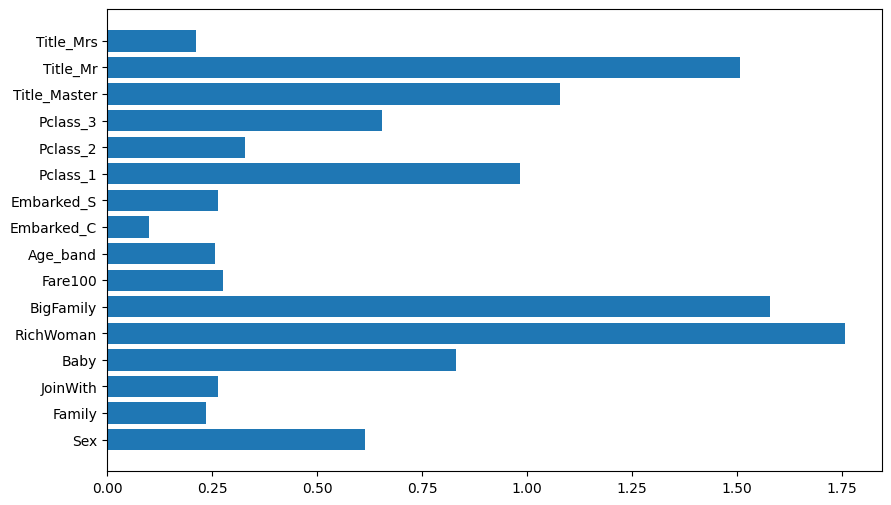

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = model.coef_[0]
coefficients = abs(coefficients)
feature_names = X_titanic_df.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.show()

best 하이퍼파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 로지스틱 회귀 모델 생성
logreg = LogisticRegression()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)

# 최적 모델 출력
best_model = grid_search.best_estimator_
print("Best Model: ", best_model)

# 테스트 데이터에 대한 예측 및 성능 평가
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters:  {'C': 1, 'penalty': 'l2'}
Best Model:  LogisticRegression(C=1)
Test Accuracy:  0.888268156424581


In [ ]:
test1 = test1.drop('Survived', axis=1)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
test_input = test1.values
pred = model.predict(test_input)

submission = {'Survived': [],
        }

submission = pd.DataFrame(submission)

submission['Survived'] = pred.astype(int)
submission


atest = pd.read_csv('/content/drive/MyDrive/ydms/titanic/test.csv')
submission = pd.concat([atest['PassengerId'], submission], axis=1)

submission.to_csv("/content/drive/MyDrive/ydms/titanic/submission_result_onehot_reg.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

# DecisionTreeClassifier GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=11), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)

print('DecisionTreeClassifier Best Parameters:', grid_dt.best_params_)
print('DecisionTreeClassifier Best Train Accuracy:', grid_dt.best_score_)

# Test Accuracy
dt_best_model = grid_dt.best_estimator_
dt_test_pred = dt_best_model.predict(X_test)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
print('DecisionTreeClassifier Best Test Accuracy:', dt_test_accuracy)

DecisionTreeClassifier Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
DecisionTreeClassifier Best Train Accuracy: 0.8146459174628189
DecisionTreeClassifier Best Test Accuracy: 0.88268156424581


<Axes: >

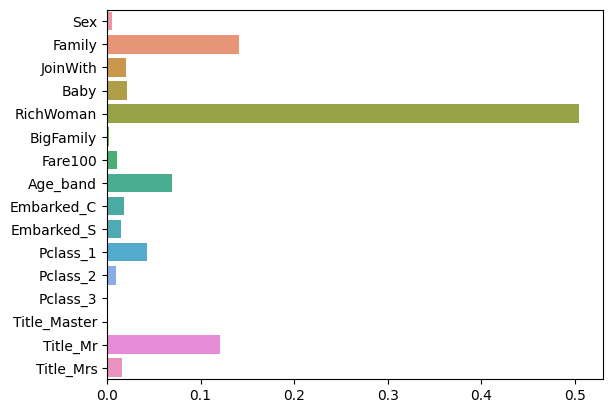

In [ ]:
model = DecisionTreeClassifier(random_state=11)
model.fit(X_train, y_train)

sns.barplot(x=model.feature_importances_, y= model.feature_names_in_)